<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/Fashion_Class_Classification_with_CNN_by_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion Class Classification with CNN by keras

https://www.kaggle.com/zalando-research/fashionmnist



In [ ]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt, os
from sklearn import model_selection

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/'
!kaggle datasets download -d zalando-research/fashionmnist
!unzip \*.zip && rm *.zip

fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [ ]:
train.shape, test.shape

((60000, 785), (10000, 785))

3


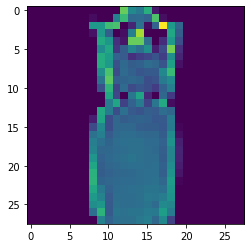

In [ ]:
'''To visiulize data we need to transfer the
data frame to an numpy array,
otherwise we can't do this
'''
train_array = np.array(train, dtype='float32')
test_array = np.array(test, dtype='float32')
number = 43603
plt.imshow(train_array[number, 1:].reshape(28, 28))
print(train.label[number])

In [ ]:
x_train , y_train = train_array[:, 1:] / 255.0, train_array[:, 0]
x_test , y_test = test_array[:, 1:] / 255.0, test_array[:, 0]

In [ ]:
train_x, val_x, train_y, val_y = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=353)

In [ ]:
# To make data ready for CNN algorithm, 
# we need to transfer each raw image, to 28 * 28 * 1 form

train_x = train_x.reshape(train_x.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
val_x = val_x.reshape(val_x.shape[0], *(28, 28, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(10, activation='sigmoid'))
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
cnn_model.fit(train_x, train_y, batch_size=512, epochs=50, verbose=1, validation_data=(val_x, val_y))

Epoch 1/50
94/94 [==============================] - 15s 25ms/step - loss: 1.9080 - accuracy: 0.3777 - val_loss: 0.8072 - val_accuracy: 0.7173
Epoch 2/50
94/94 [==============================] - 2s 19ms/step - loss: 0.7386 - accuracy: 0.7362 - val_loss: 0.6391 - val_accuracy: 0.7649
Epoch 3/50
94/94 [==============================] - 2s 19ms/step - loss: 0.6071 - accuracy: 0.7816 - val_loss: 0.5735 - val_accuracy: 0.7918
Epoch 4/50
94/94 [==============================] - 2s 19ms/step - loss: 0.5556 - accuracy: 0.7977 - val_loss: 0.5287 - val_accuracy: 0.8090
Epoch 5/50
94/94 [==============================] - 2s 19ms/step - loss: 0.5080 - accuracy: 0.8136 - val_loss: 0.5124 - val_accuracy: 0.8131
Epoch 6/50
94/94 [==============================] - 2s 19ms/step - loss: 0.4916 - accuracy: 0.8195 - val_loss: 0.4863 - val_accuracy: 0.8257
Epoch 7/50
94/94 [==============================] - 2s 19ms/step - loss: 0.4694 - accuracy: 0.8288 - val_loss: 0.4767 - val_accuracy: 0.8288
Epoch 8/50
9

In [ ]:
evaluation = cnn_model.evaluate(x_test, y_test)
print(evaluation)

313/313 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8714
[0.3572372794151306, 0.871399998664856]


In [ ]:
predicted = cnn_model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
